# 다중로지스틱회귀 (IRIS 데이터셋)

종속변수가 세 개 이상의 분류를 갖는 로지스틱회귀.

## #01. 준비작업

### [1] 패키지 가져오기

In [1]:
import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(work_path)

from help_a.util import *
from help_a.plot import *
from help_a.analysis import *
from help_a.classification import *

### [2] 데이터 가져오기

붓꽃(iris)은 관상용으로도 재배되는 아름다운 꽃이며 크기와 색상이 다른 많은 종이 있다.

세 붓꽃 종의 이름은 `Versicolor`, `Setosa`, `Virginica`이며 각 종에 따라 꽃받침의 길이와 너비, 꽃잎의 길이와 너비가 약간씩 차이가 난다.

> https://www.kaggle.com/datasets/uciml/iris

![img](res/iris.png)

In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/iris.xlsx", categories=['Species'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Sepal.Length  150 non-null    float64 
 1   Sepal.Width   150 non-null    float64 
 2   Petal.Length  150 non-null    float64 
 3   Petal.Width   150 non-null    float64 
 4   Species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB
None

데이터프레임 상위 5개 행
+----+----------------+---------------+----------------+---------------+-----------+
|    |   Sepal.Length |   Sepal.Width |   Petal.Length |   Petal.Width | Species   |
|----+----------------+---------------+----------------+---------------+-----------|
|  0 |            5.1 |           3.5 |            1.4 |           0.2 | setosa    |
|  1 |            4.9 |             3 |            1.4 |           0.2 | setosa    |
|  2 |            4.7 |           3.2 |            1.3 |           0.2 | setosa    |
|  3

## #02. 탐색적 데이터 분석

### [1] 품종에 따른 데이터 분포 확인

이항분류의 경우 커널밀도 함수등으로 종속변수 따른 데이터 분포를 확인

다항분류의 경우 산점도 그래프를 통해 종속변수에 따른 데이터 군집이 존재 하는지를 확인

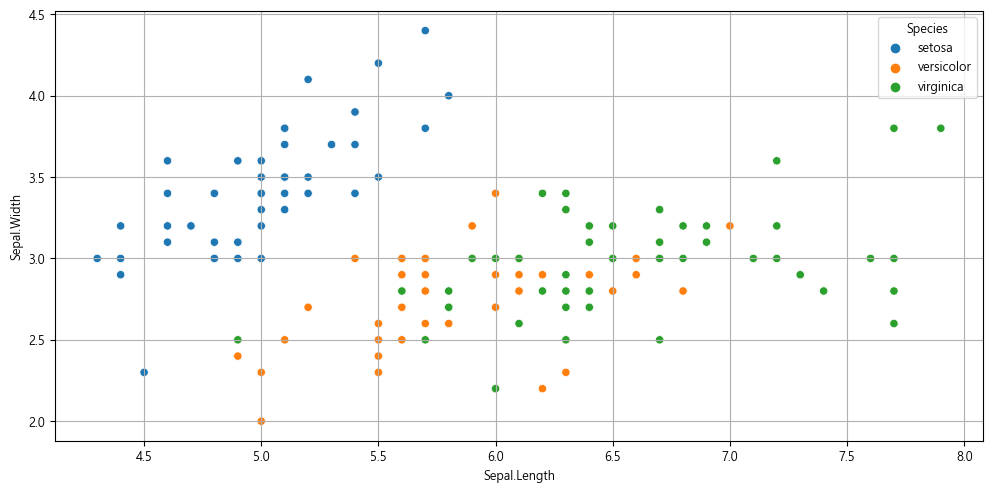

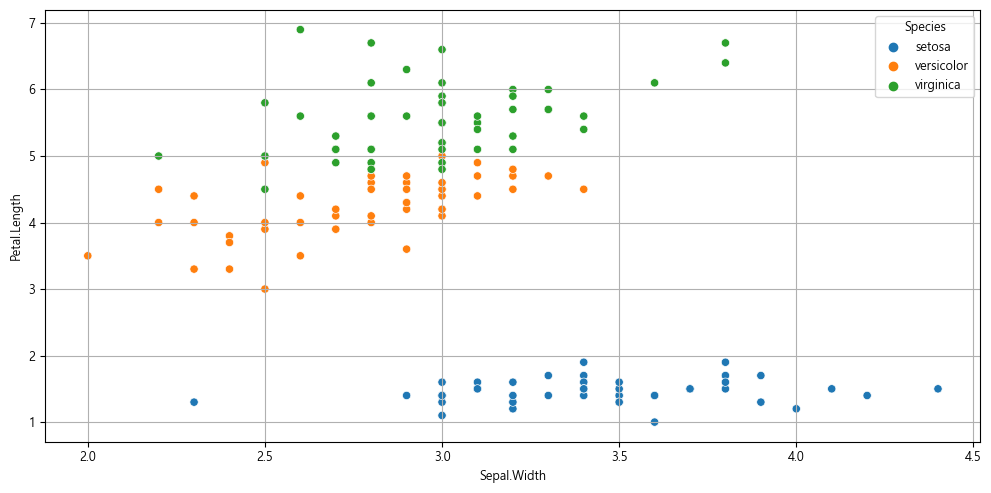

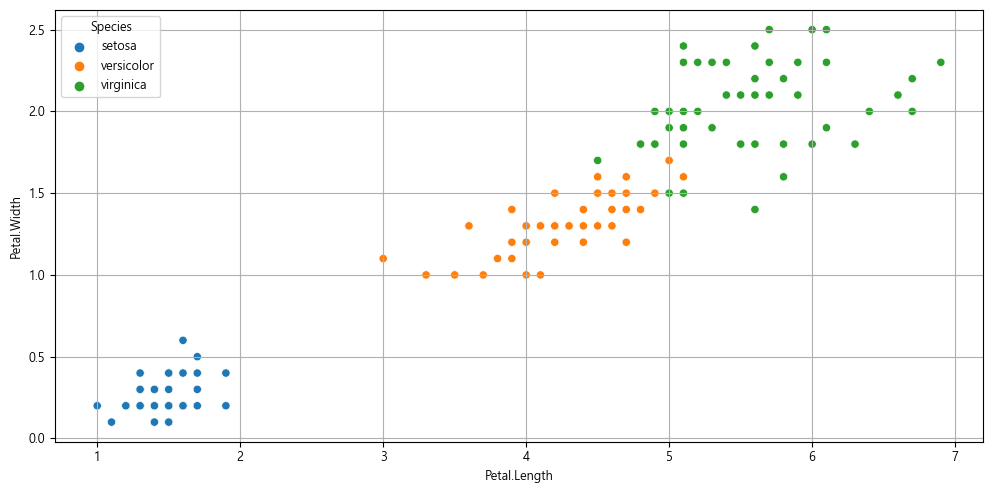

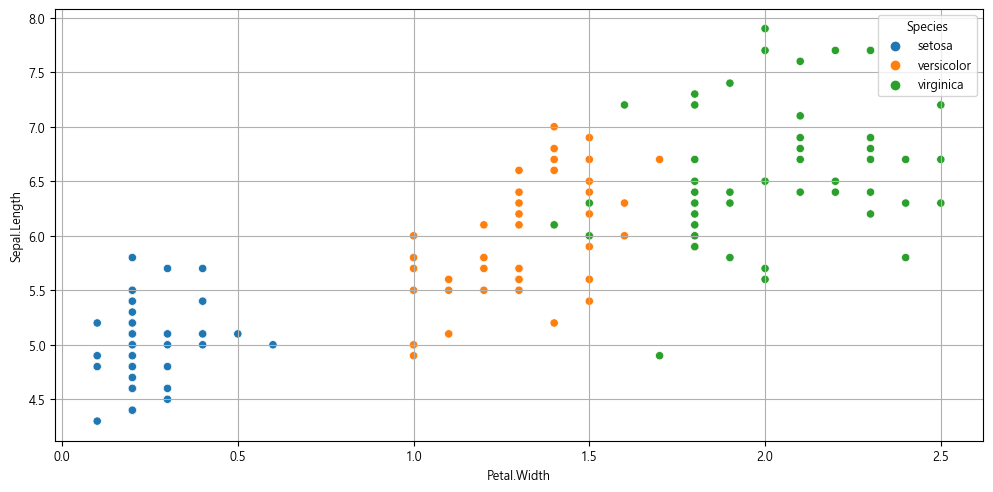

In [3]:
names = origin.columns[:-1]
size = len(names)

for i in range(0, size):
    j = (i + 1) % size
    #print(i, j)
    #print(names[i], names[j])
    my_scatterplot(origin, xname=names[i], yname=names[j], hue='Species')

> 명확하게 품종에 따라 군집이 형성되어 있는 것을 확인할 수 있다.

### [2] 상자그림 확인

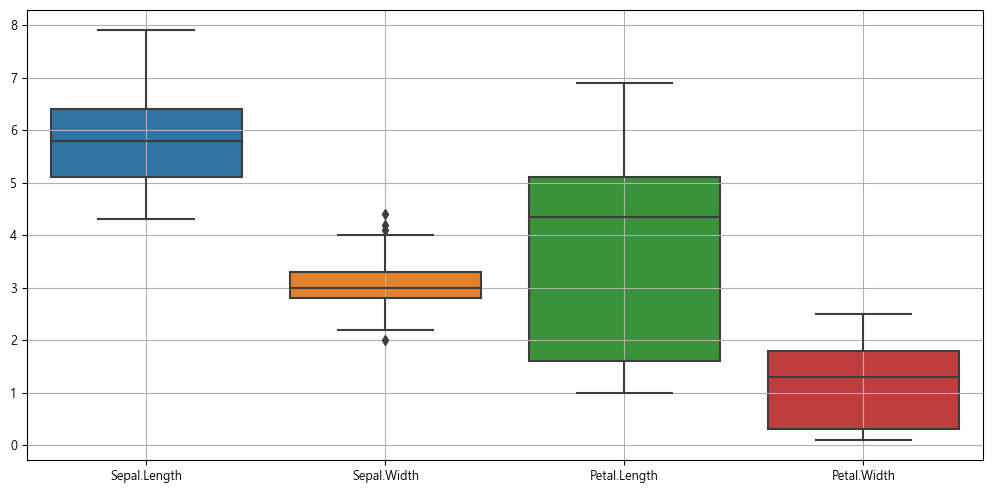

In [4]:
my_boxplot(origin)

> 데이터 스케일링은 필요해 보인다.

## #03. 데이터 전처리

### [1] 데이터 스케일링

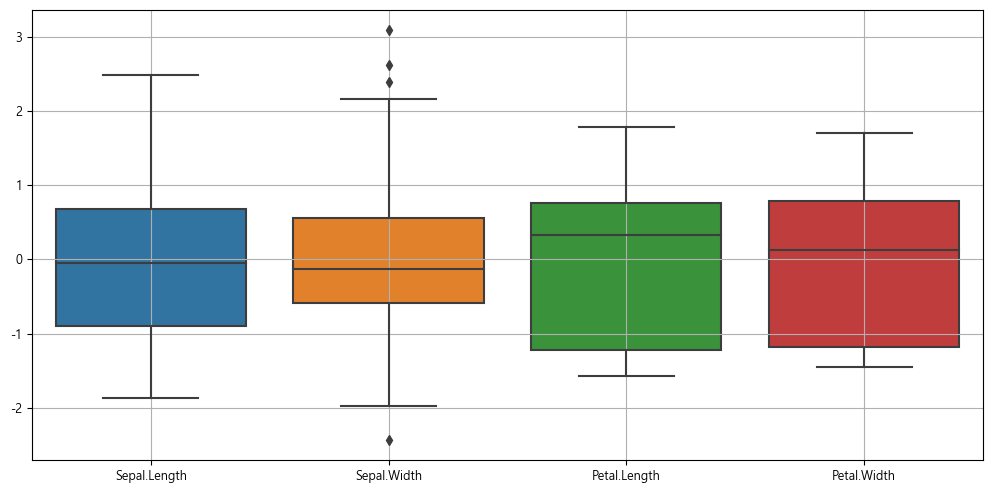

In [5]:
df = my_standard_scaler(origin, yname='Species')
my_boxplot(df)

> 이상치의 수가 크지 않고, 종속변수가 50, 50, 50으로 균형을 이루고 있으므로 이 균형을 유지하기 위해 이상치 제거는 하지 않도록 함.

### [2] 종속변수 라벨링

In [6]:
df2 = my_labelling(df, 'Species')
my_pretty_table(df2.head())

+----+----------------+---------------+----------------+---------------+-----------+
|    |   Sepal.Length |   Sepal.Width |   Petal.Length |   Petal.Width |   Species |
|----+----------------+---------------+----------------+---------------+-----------|
|  0 |      -0.900681 |         1.019 |       -1.34023 |      -1.31544 |         0 |
|  1 |       -1.14302 |     -0.131979 |       -1.34023 |      -1.31544 |         0 |
|  2 |       -1.38535 |      0.328414 |       -1.39706 |      -1.31544 |         0 |
|  3 |       -1.50652 |     0.0982173 |       -1.28339 |      -1.31544 |         0 |
|  4 |       -1.02185 |        1.2492 |       -1.34023 |      -1.31544 |         0 |
+----+----------------+---------------+----------------+---------------+-----------+


## #04. 로지스틱 회귀 모형

### [1] 데이터 분할

In [7]:
x_train, x_test, y_train, y_test = my_train_test_split(df2, yname='Species', test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

### [2] 로지스틱 회귀 구현

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
| 13 |    10 | l2        |          0.966667 |
| 16 |   100 | l2        |          0.966667 |
| 10 |     1 | l2        |          0.958333 |
|  7 |   0.1 | l2        |          0.908333 |
|  4 |  0.01 | l2        |          0.858333 |
|  1 | 0.001 | l2        |          0.508333 |
+----+-------+-----------+-------------------+

[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.991667 |     0.966667 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |     0.991667 |     0.952381 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
|

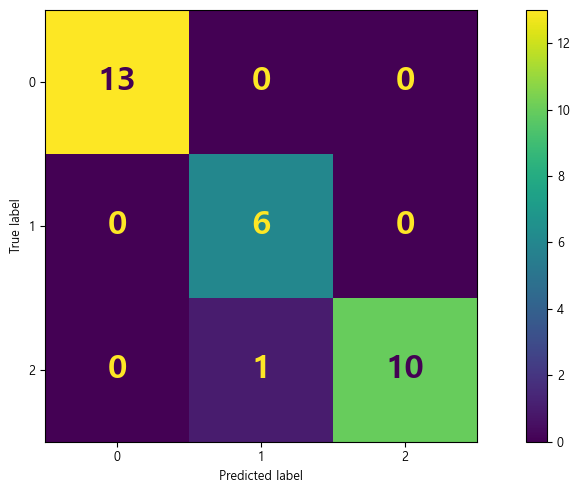


[학습곡선]


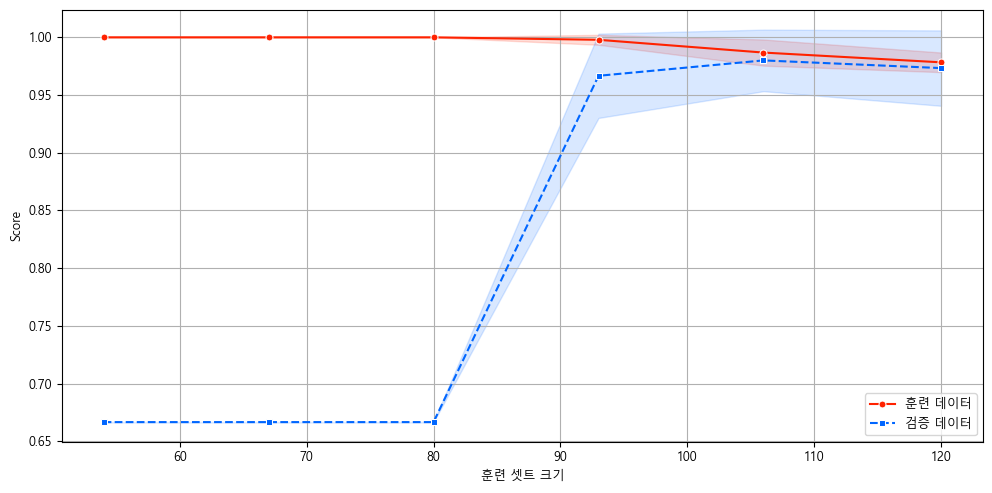

In [9]:
estimator = my_logistic_classification(x_train, y_train, x_test, y_test, roc_curve=False, pr_curve =False, report=False)


### [5] 다항로지스틱의 ROC Curve

### [1] OvO (One vs One)

데이터 세트의 가능한 모든 클래스 조합을 비교하는 방식

3개의 클래스가 있을 때 `0` vs `1`과 `1` vs `0`은 서로 다르기 때문에 두 경우를 모두 고려해야 한다.

그러므로 IRIS 데이터 셋에는 총 6개의 OvO 점수를 얻는다.

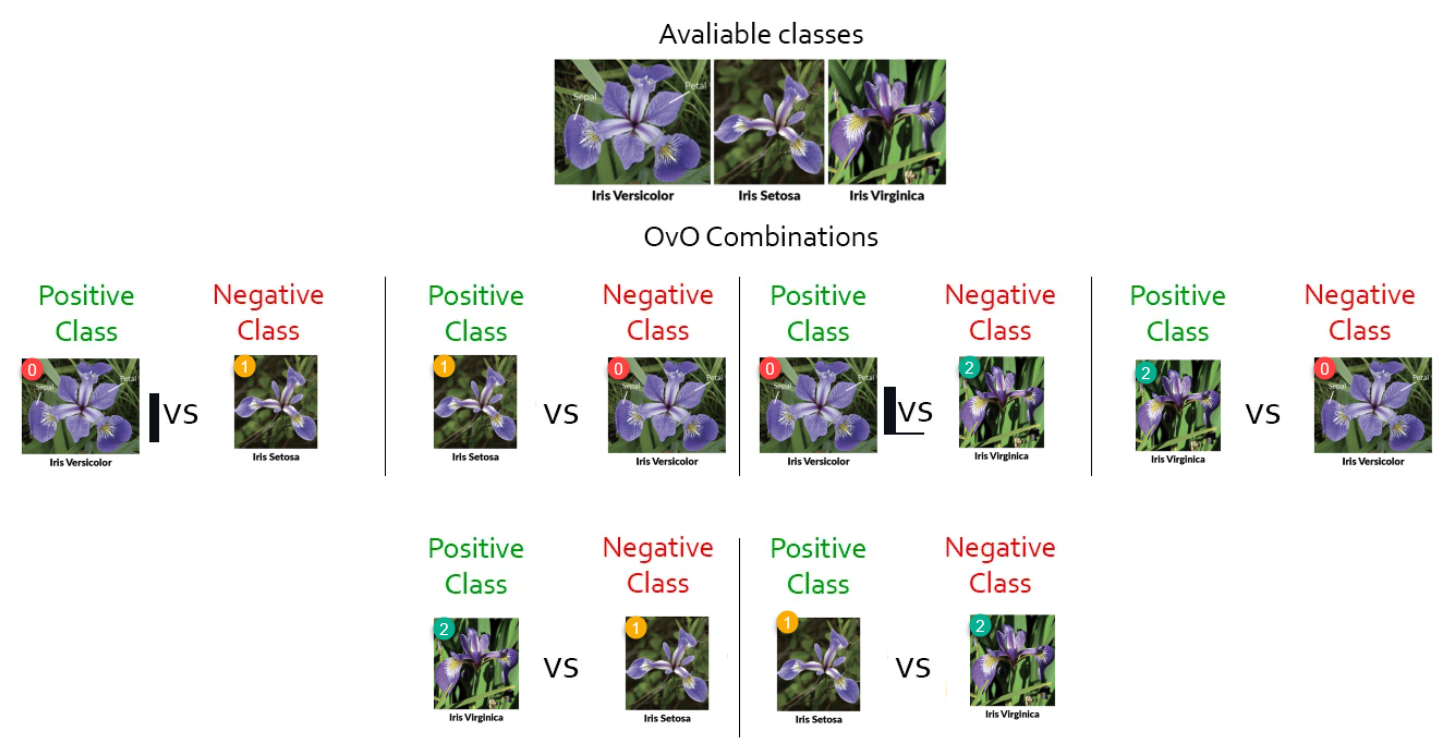

#### (1) 모든 클래스 쌍의 조합 만들기   

In [10]:
class_combinations = []
class_list = sorted(list(y_train.unique()))
size = len(class_list)

for i in range(0, size):
    j = (i + 1) % size
    comb_item = [class_list[i], class_list[j]]
    class_combinations.append(comb_item)

    comb_item = [class_list[j], class_list[i]]
    class_combinations.append(comb_item)

class_combinations

[[0, 1], [1, 0], [1, 2], [2, 1], [2, 0], [0, 2]]

#### (2) 분류 확률값  

In [11]:
y_proba = estimator.predict_proba(x_test)
y_proba[:3]

array([[2.11437309e-05, 5.82362166e-01, 4.17616690e-01],
       [9.15755948e-08, 1.14354463e-02, 9.88564462e-01],
       [1.14452656e-08, 1.33313749e-03, 9.98666851e-01]])

#### (3) Histogram, ROC, PR Curve

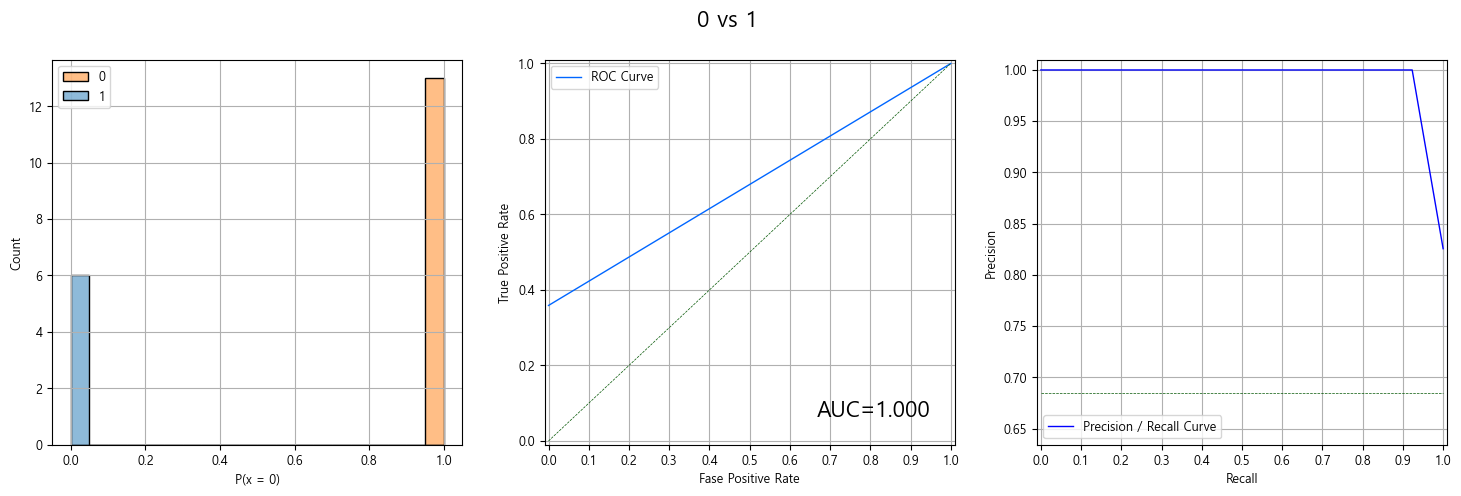

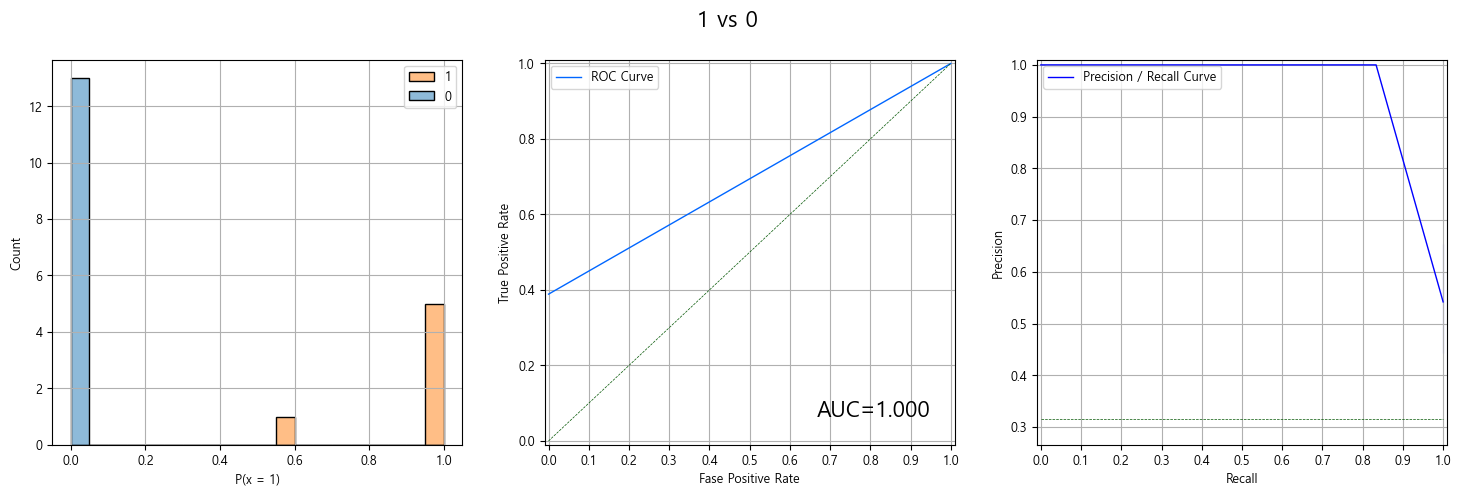

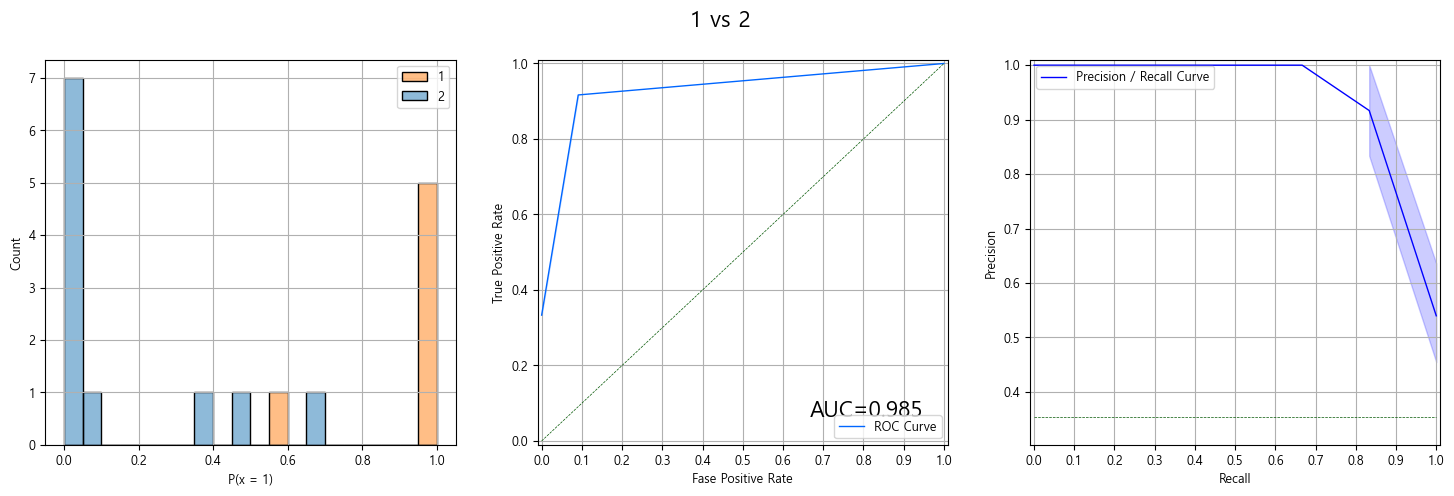

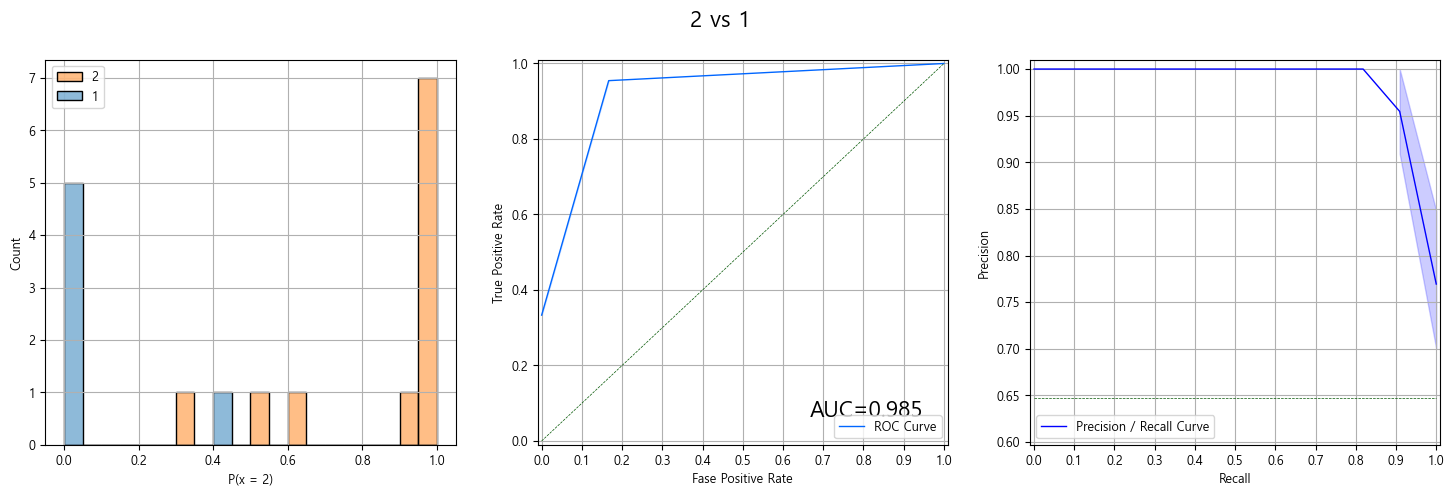

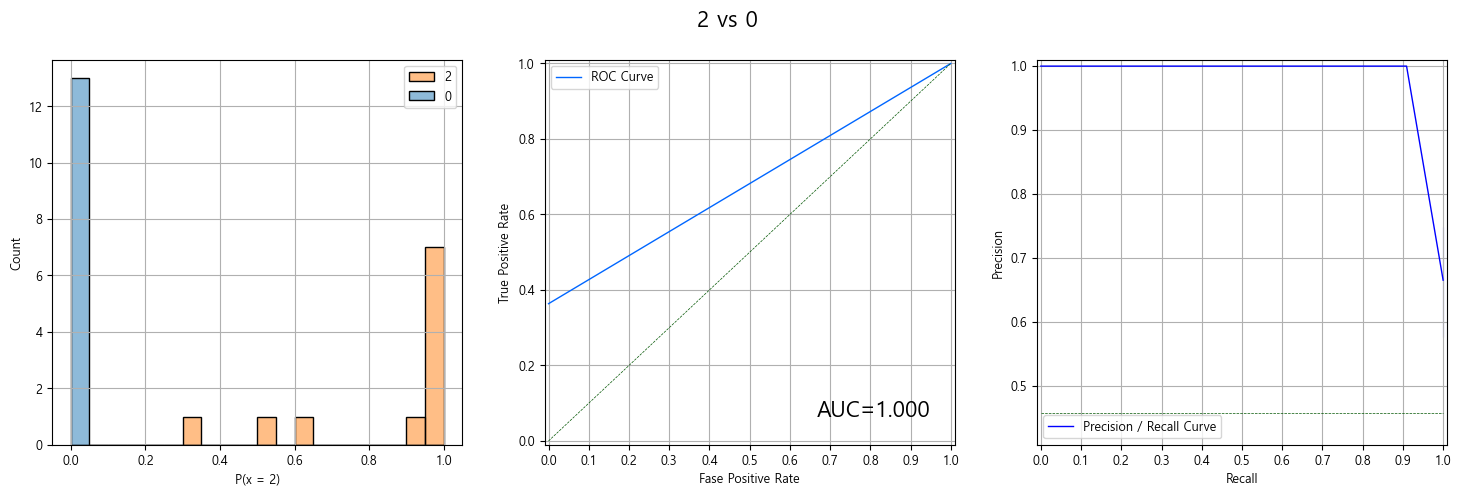

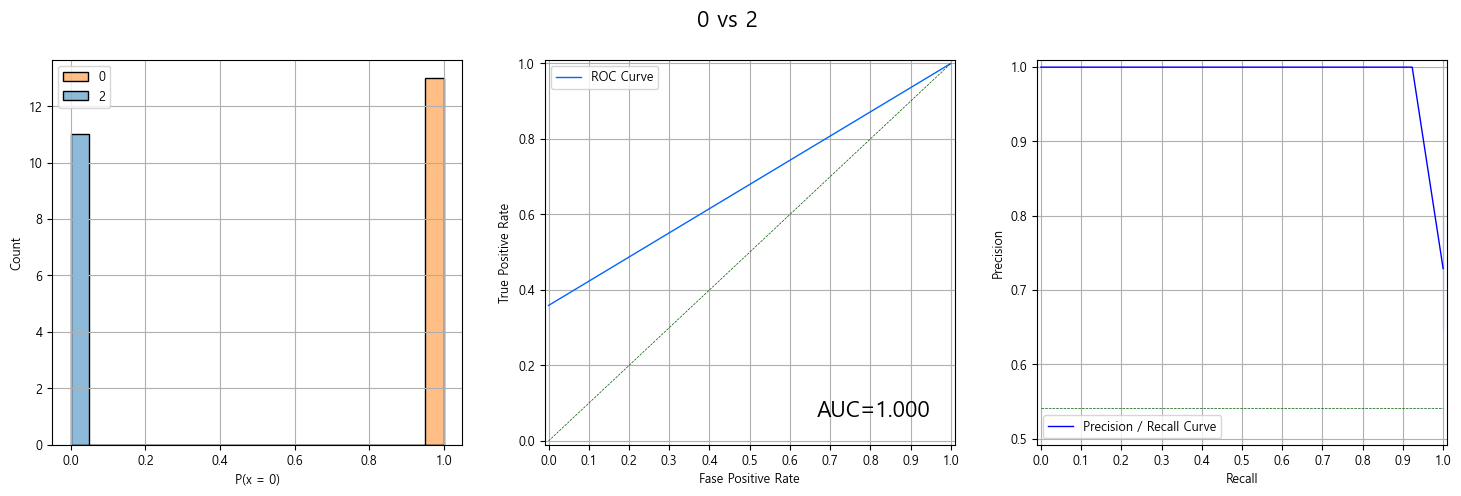

mean roc auc ovo: 0.9949


In [13]:
# 히스토그램을 위한 구간
bins = [i/20 for i in range(0, 21)]
#bins

# 각 대조군 별로 auc값을 저장할 리스트
auc_list = []

# 대조군 단위로 반복
for i in range(len(class_combinations)):
    c1, c2 = class_combinations[i]
    #print(c1, c2)
    c1_index = class_list.index(c1)
    title = "{0} vs {1}".format(c1, c2)
    #print(title)

    # 비교 대상에 대한 데이터 
    df_aux = DataFrame({
        'class': y_test,
        'prob': y_proba[:, c1_index]
    })

    # 현재 대조군에 맞는 항목만 필터링
    df_aux = df_aux[(df_aux['class'] == c1) | (df_aux['class'] == c2)]

    # 현재 대조군 데이터 중에서 맞춘 것은 1, 못맞춘 것은 0으로 재설정
    df_aux['class'] = [1 if y == c1 else 0 for y in df_aux['class']]
    df_aux = df_aux.reset_index(drop = True)

    #my_pretty_table(df_aux.head(10))

    # 시각화 시작
    fig, ax = plt.subplots(1, 3, figsize=(18, 5), dpi=100)
    plt.suptitle(title, fontsize=16)

    # ax[0] : histogram -------------------------
    sb.histplot(data= df_aux, x='prob', hue='class', bins=bins, ax=ax[0])
    ax[0].legend([f"{c1}", f"{c2}"])
    ax[0].set_xlabel(f"P(x = {c1})")
    ax[0].grid()

    # ax[1] : ROC Curve -------------------------
    fpr, tpr, _ = roc_curve(df_aux['class'], df_aux['prob'])
    auc = roc_auc_score(df_aux['class'], df_aux['prob'])

    sb.lineplot(x=fpr, y=tpr, linewidth=1, label='ROC Curve', color="#0066ff", ci=0, ax=ax[1])
    sb.lineplot(x=[0,1], y=[0,1], linestyle='--', color="#005500", linewidth=0.5, ax=ax[1])
    ax[1].set_xlabel('Fase Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_xticks(np.round(np.arange(0, 1.1, 0.1),2))
    ax[1].set_xlim([-0.01,1.01])
    ax[1].set_ylim([-0.01,1.01])
    ax[1].grid()
    ax[1].text(0.95, 0.05, 'AUC=%0.3f' % auc, fontsize=16, ha='right', va='bottom')

    # ax[2] : PR Curve -------------------------
    precision, recall, thresholds = precision_recall_curve(df_aux['class'], df_aux['prob'])
    y_mean = df_aux['class'].mean()
    
    sb.lineplot(x=recall, y=precision, label='Precision / Recall Curve', color='blue', linewidth=1, ax=ax[2])
    sb.lineplot(x=[0,1], y=[y_mean,y_mean], color='#005500', linewidth=0.5, linestyle='--', ax=ax[2])
    ax[2].set_xlabel('Recall')
    ax[2].set_ylabel('Precision')
    ax[2].set_xticks(np.round(np.arange(0, 1.1, 0.1), 2))
    ax[2].set_xlim([-0.01, 1.01])
    ax[2].set_ylim([y_mean-0.05, 1.01])
    ax[2].legend()
    ax[2].grid()

    plt.show()
    plt.close()

    auc_list.append(auc)

    #break

print(f"mean roc auc ovo: {sum(auc_list)/len(auc_list):.4f}")

### [2] OvR (One vs Rest)

하나의 클래스를 "긍정적" 클래스로 간주하고 나머지 모든 클래스를 "부정적" 클래스로 간주하여 비교하는 방식

이를 통해 멀티클래스 분류를 이진 분류로 줄이므로 알려진 모든 이진 분류 측정 항목을 사용하여 이 시나리오를 평가할 수 있다

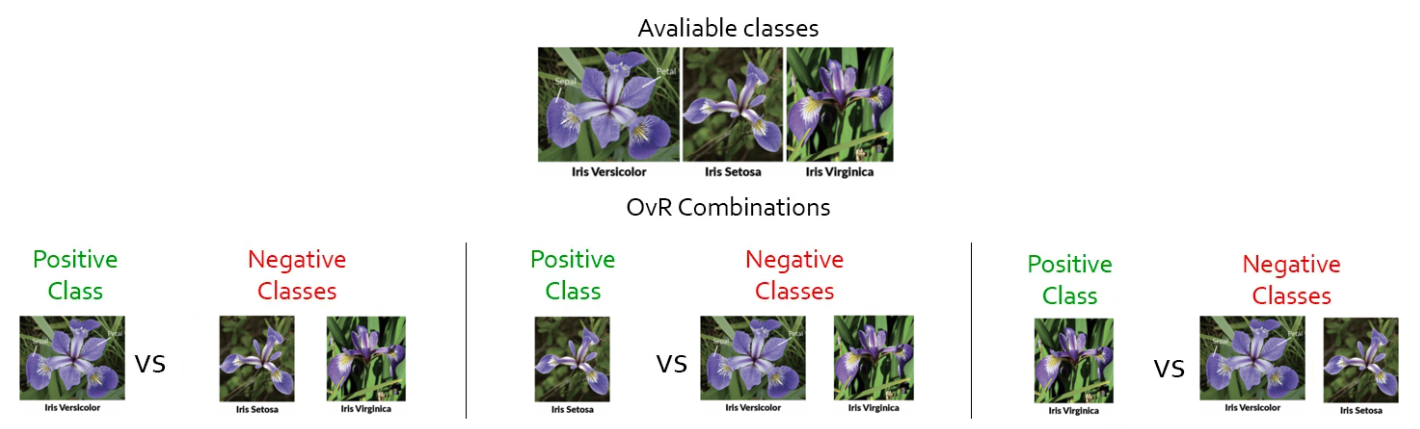

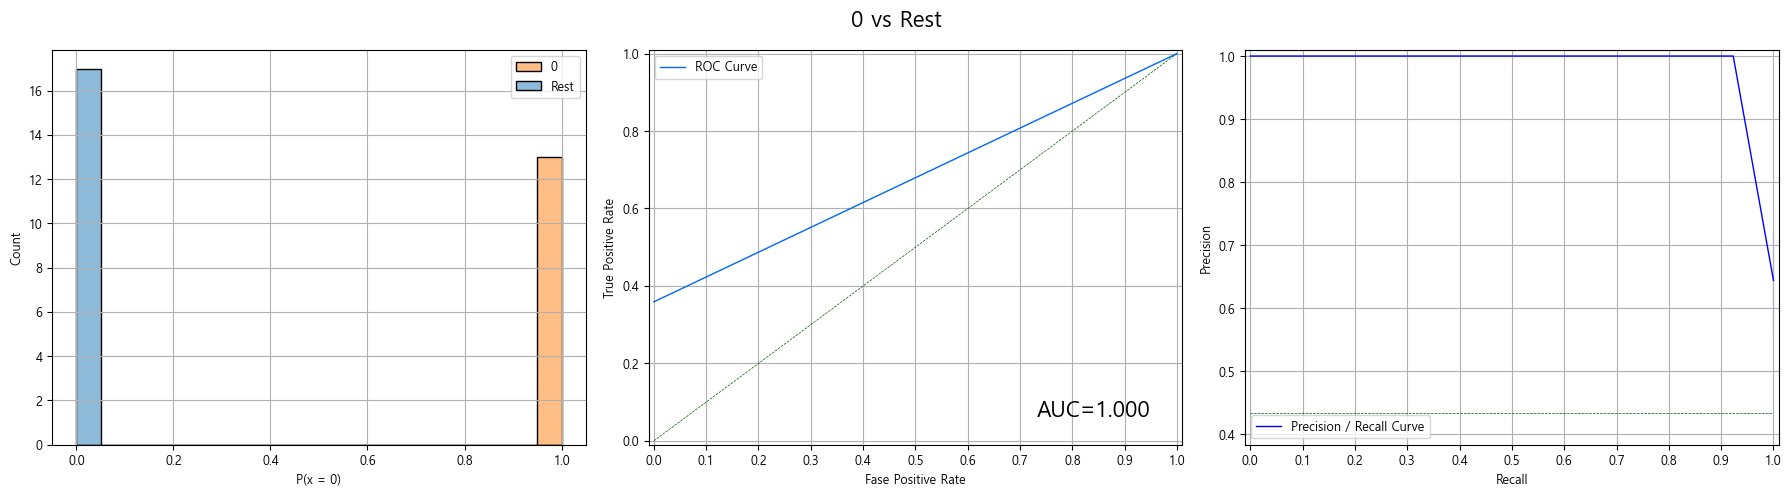

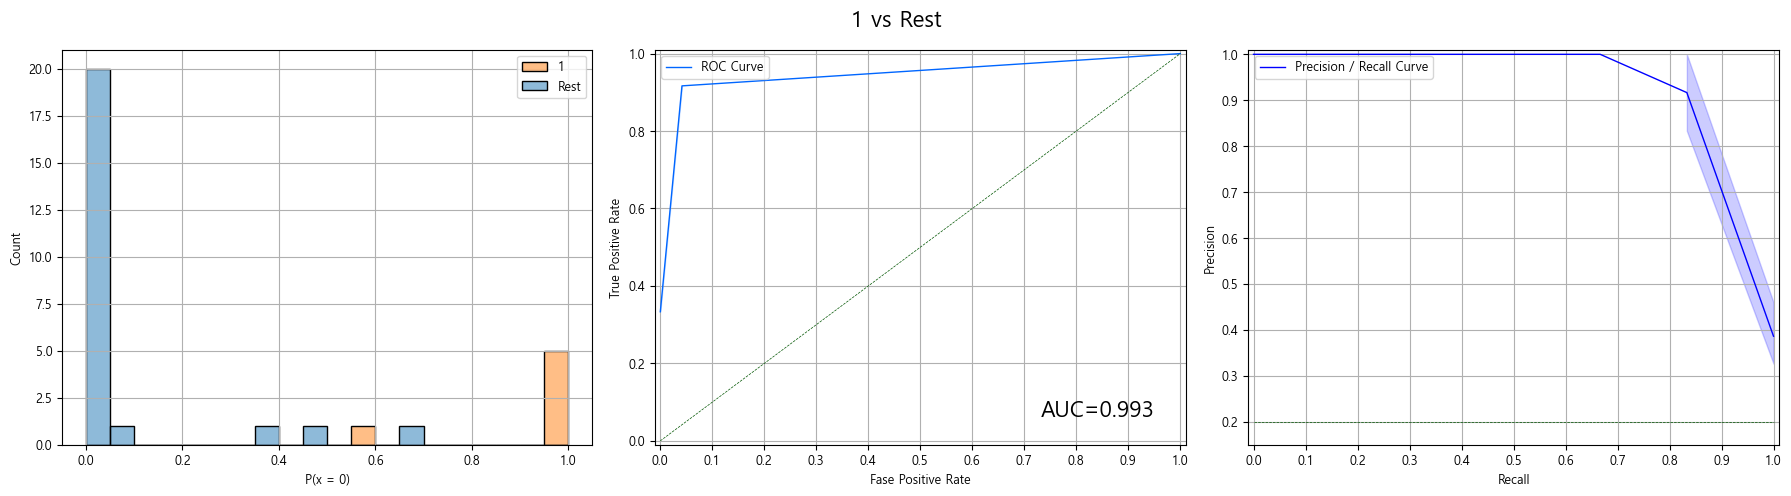

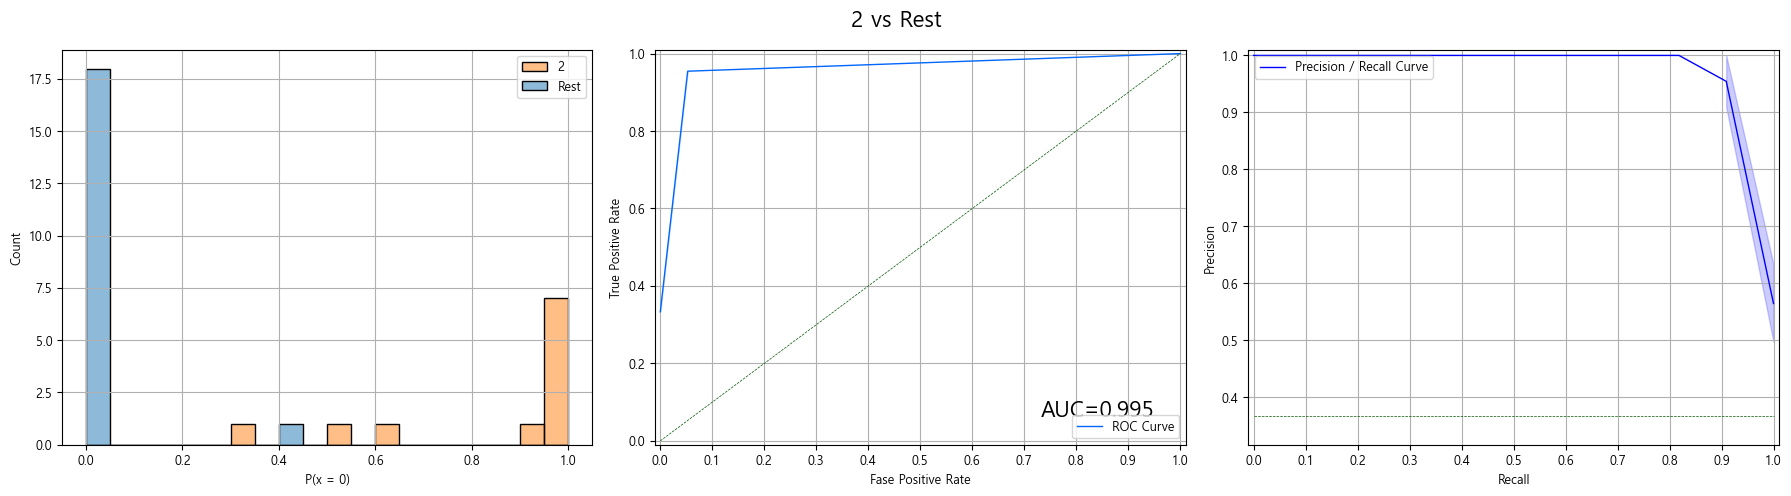

mean roc auc ovo: 0.9961


In [14]:
# 각 대조군 별로 auc값을 저장할 리스트
auc_list = []

# 대조군 단위로 반복
for i in range(0, size):
    c = class_list[i]
    title = "{0} vs Rest".format(c)
    #print(title)

    # 비교 대상에 대한 데이터 
    df_aux = DataFrame({
        'class': y_test,
        'prob': y_proba[:, i]
    })
    #my_pretty_table(df_aux.head())

    # class값에서 현재 c를 True에 해당하는 1로, 나머지를 False에 해당하는 0으로 변경
    df_aux['class'] = np.where(df_aux['class'] == c, 1, 0)
    #my_pretty_table(df_aux.head())

    # 인덱스 재설정
    df_aux = df_aux.reset_index(drop = True)
    #my_pretty_table(df_aux.head())

    # 시각화 시작
    fig, ax = plt.subplots(1, 3, figsize=(18, 5), dpi=100)
    plt.suptitle(title, fontsize=16)

    # ax[0] : histogram -------------------------
    sb.histplot(data= df_aux, x='prob', hue='class', bins=bins, ax=ax[0])
    ax[0].legend([f"{c}", "Rest"])
    ax[0].set_xlabel(f"P(x = {c1})")
    ax[0].grid()

    # ax[1] : ROC Curve -------------------------
    fpr, tpr, _ = roc_curve(df_aux['class'], df_aux['prob'])
    auc = roc_auc_score(df_aux['class'], df_aux['prob'])

    sb.lineplot(x=fpr, y=tpr, linewidth=1, label='ROC Curve', color="#0066ff", ci=0, ax=ax[1])
    sb.lineplot(x=[0,1], y=[0,1], linestyle='--', color="#005500", linewidth=0.5, ax=ax[1])
    ax[1].set_xlabel('Fase Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_xticks(np.round(np.arange(0, 1.1, 0.1),2))
    ax[1].set_xlim([-0.01,1.01])
    ax[1].set_ylim([-0.01,1.01])
    ax[1].grid()
    ax[1].text(0.95, 0.05, 'AUC=%0.3f' % auc, fontsize=16, ha='right', va='bottom')

    # ax[2] : PR Curve -------------------------
    precision, recall, thresholds = precision_recall_curve(df_aux['class'], df_aux['prob'])
    y_mean = df_aux['class'].mean()
    
    sb.lineplot(x=recall, y=precision, label='Precision / Recall Curve', color='blue', linewidth=1, ax=ax[2])
    sb.lineplot(x=[0,1], y=[y_mean,y_mean], color='#005500', linewidth=0.5, linestyle='--', ax=ax[2])
    ax[2].set_xlabel('Recall')
    ax[2].set_ylabel('Precision')
    ax[2].set_xticks(np.round(np.arange(0, 1.1, 0.1), 2))
    ax[2].set_xlim([-0.01, 1.01])
    ax[2].set_ylim([y_mean-0.05, 1.01])
    ax[2].legend()
    ax[2].grid()

    plt.tight_layout()
    plt.show()
    plt.close()

    auc_list.append(auc)

    #break

print(f"mean roc auc ovo: {sum(auc_list)/len(auc_list):.4f}")